# Working with RGB images in PyTorch

The purpose of this notebook is to illustrate how to use PyTorch tensors when working with image files.

## Source:

The images are taken from [GitHub: Deep Learning with PyTorch](https://github.com/deep-learning-with-pytorch/dlwpt-code/tree/master) and the code is based on the example given there.

# Imports

In [6]:
import os
import torch
import imageio
import numpy as np
import matplotlib.pyplot as plt
from typing import List

# Reading PNG images via Python

The following functions allows us to read an image file and convert it into a NumPy array:

In [7]:
def read_image(path) -> np.ndarray:
    return imageio.imread(path)

In the case of PNG image the resulting array will be 3D and of shape `(width, height, channels)` where `width` and `height` are given by the measurements of the image and `channels` is the number of color channels, which for RGB is 3. We can plot each channel separetly using the following helper functions.

In [12]:
def get_channel(img, channel: str) -> np.ndarray:
    if channel == 'R':
        img = img[:, :, 0]
    elif channel == 'G':
        img = img[:, :, 1]
    elif channel == 'B':
        img = img[:, :, 2]
    else:
        raise NotImplementedError
    return img


def plot_image(img, channel=None) -> None:
    if not channel:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        img = get_channel(img, channel)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()

Here is an example:

/tmp/ipykernel_11843/3955391366.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return imageio.imread(path)


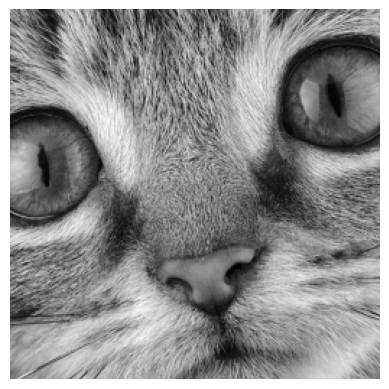

In [13]:
img = read_image(path='working-with-images/data/cat1.png')
plot_image(img, channel='G')

# Creating Tensors

Building on the previous function for reading a image as a NumPy array we can use the following function to create a PyTorch tensor from it. We use the `permute` method to make the channel dimension the first dimension in the resulting tensor.

In [14]:
def to_tensor(path):
    img_data = read_image(path)
    img_tensor = torch.from_numpy(img_data)
    
    return img_tensor.permute(2, 0, 1)

In [15]:
to_tensor('working-with-images/data/cat1.png')

/tmp/ipykernel_11843/3955391366.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return imageio.imread(path)


tensor([[[156, 152, 124,  ..., 150, 149, 158],
         [174, 134, 165,  ..., 120, 136, 138],
         [127, 156, 107,  ..., 131, 143, 164],
         ...,
         [116, 130, 129,  ..., 127, 118, 112],
         [129, 130, 123,  ..., 115, 121, 114],
         [129, 123, 118,  ..., 113, 121, 120]],

        [[139, 135, 109,  ..., 135, 135, 147],
         [160, 119, 149,  ..., 105, 122, 124],
         [113, 140,  90,  ..., 118, 129, 152],
         ...,
         [ 99, 110, 111,  ..., 117, 108, 103],
         [111, 111, 106,  ..., 106, 112, 105],
         [111, 104, 102,  ..., 103, 110, 111]],

        [[129, 123,  98,  ..., 131, 132, 145],
         [155, 110, 137,  ..., 102, 119, 121],
         [104, 132,  80,  ..., 112, 125, 146],
         ...,
         [ 93, 108, 105,  ..., 125, 115, 108],
         [108, 108,  98,  ..., 110, 117, 110],
         [107,  98,  95,  ..., 108, 115, 116]]], dtype=torch.uint8)

We can check that everything still works by re-permuting the dimensions and plotting the resulting data:

/tmp/ipykernel_11843/3955391366.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return imageio.imread(path)


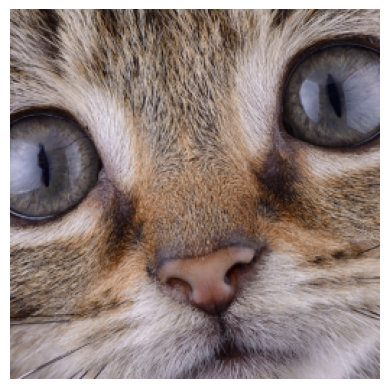

In [17]:
plot_image(to_tensor('working-with-images/data/cat1.png').permute(1, 2, 0).numpy())

# Creating a batch

In this section we want to create a batch of several images and then apply batch normalization.

In [29]:
def read_images(data_dir = 'working-with-images/data/') -> List[torch.Tensor]:
    filenames = [
        name for name in os.listdir(data_dir)
        if os.path.splitext(name)[-1] == '.png'
    ]
    
    batch = []
    
    for filename in filenames:
        batch.append(to_tensor(os.path.join(data_dir, filename)))
        
    return batch

In [31]:
BATCH_SIZE = 3
N_CHANNELS = 3
HEIGHT = 256
WIDTH = 256

batch = torch.zeros(BATCH_SIZE, N_CHANNELS, HEIGHT, WIDTH, dtype=torch.int32)

for pos, image_tensor in enumerate(read_images()):
    if pos < BATCH_SIZE:
        batch[pos] = image_tensor

/tmp/ipykernel_11843/3955391366.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return imageio.imread(path)


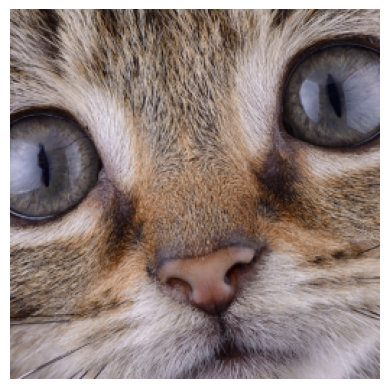

In [32]:
plot_image(batch[0].permute(1, 2, 0))

In [33]:
def plot_histogram(image_array: np.ndarray, bins, range):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    axes[0].imshow(image_array)
    axes[0].axis('off')

    # RGB channels
    R = image_array[:, :, 0].flatten()
    G = image_array[:, :, 1].flatten()
    B = image_array[:, :, 2].flatten()

    axes[1].hist(R, bins=bins, range=range, color='red', alpha=0.6, label='Red')
    axes[1].hist(G, bins=bins, range=range, color='green', alpha=0.6, label='Green')
    axes[1].hist(B, bins=bins, range=range, color='blue', alpha=0.6, label='Blue')

    axes[1].set_title('Histogram of RGB Distribution')
    axes[1].set_xlabel('Pixel Value')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

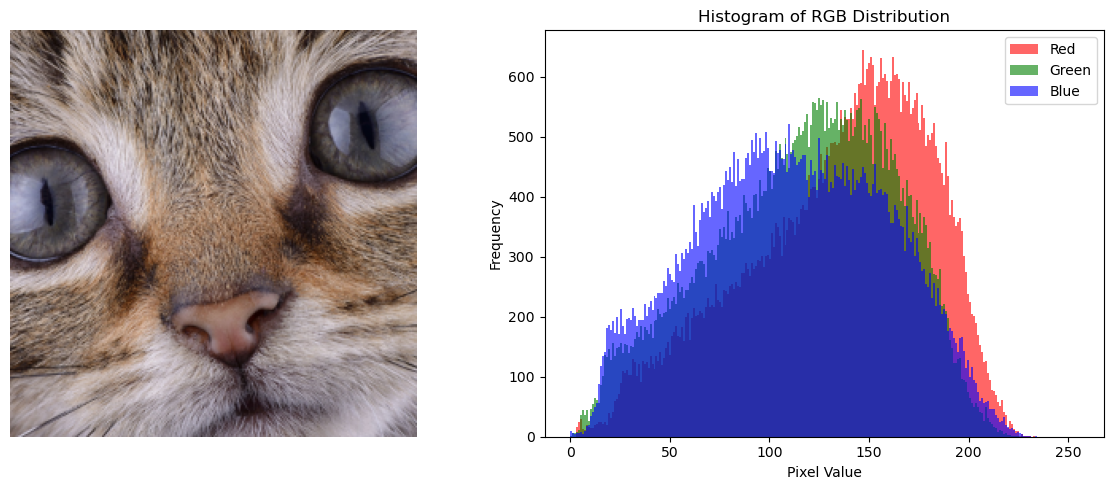

In [35]:
plot_histogram(batch[0].permute(1, 2, 0).numpy(), bins=256, range=(0, 255))

In [36]:
def normalize(batch):
    batch /= 255.0
    n_channels = 3
    for c in range(n_channels):
        mean = torch.mean(batch[:, c, :, :])
        print(f'mean: {mean}')
        std = torch.std(batch[:, c, :, :])
        print(f'std: {std}')
        batch[:, c, :, :] = (batch[:, c, :, :] - mean) / std
    
    return batch

In [37]:
batch_normalized = normalize(batch.float())

mean: 0.5799327492713928
std: 0.22118069231510162
mean: 0.4493196904659271
std: 0.20676465332508087
mean: 0.35544058680534363
std: 0.1930793672800064


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


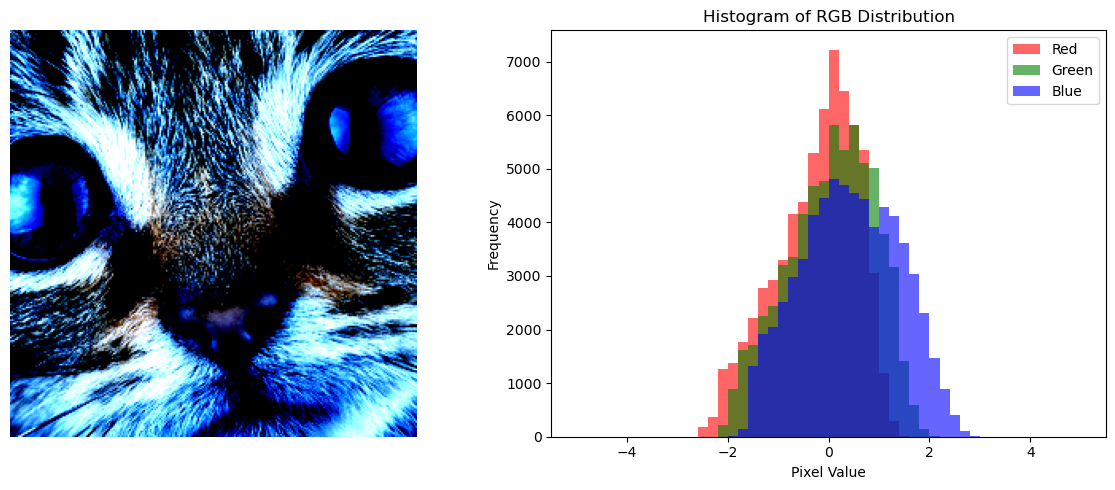

In [38]:
plot_histogram(batch_normalized[0].rename(None).permute(1,2,0), bins=50, range=(-5.0, 5.0))